<a href="https://colab.research.google.com/github/delcorej/hello-world/blob/main/mushrooms_for_cluster_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My goal is to learn how to cluster my dataset through the utilization of sklearn. I will use K-modes because it works on the type of categorical data that is within the mushroom dataset. K-modes will define clusters based upon the number of matching data points.

In [72]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [73]:
#first I need to import the necessary libaries so that later on I can run the analysis on my data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Next I shall import the dataset from google sheets
from google.colab import files
uploaded = files.upload()




#data1 = data.get_all_values()
#df = pd.DataFrame(data1)
#df.columns = df.iloc[0]
#df = df.iloc[1:]


Saving mushroom.csv to mushroom (2).csv


In [74]:
# This is for the rand index
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

# This in order to encode labels
from sklearn import preprocessing

# This if for confusion matrix
from sklearn.metrics import confusion_matrix


In [75]:
import io
data = pd.read_csv(io.BytesIO(uploaded['mushroom.csv']))

**Data Pre-processing**

In [76]:
data.head()
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [77]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [78]:
data.shape
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

The mushroom.csv can be downloaded off of kaggle via this link:https://www.kaggle.com/uciml/mushroom-classification
This dataset contains zero missing values, 8124 data values, and all of the data is composed of object values. The mushroom dataset contains the column names of class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attahcment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root,stalk-surface-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population and habitat making a total of 23 columns within the mushroom dataset.

In [79]:
# This is going to generate random numbers and make the code reproducable
np.random.seed(42)

## Time to train the model ##
Kmodes is going to be utilized because of its ability to perform predictions on categorical variables.

In [80]:
!pip install kmodes

In [81]:
bullseye = data[['class']]
data_drop = data.drop(['class'], axis=1)
data_drop.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [82]:
data_encoder = preprocessing.LabelEncoder()
data_encoded = data_drop.apply(data_encoder.fit_transform)

data_encoded.head()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


Looking back up at .nunique() the veil-type only has one unique value because of this it is not going to have an impact on the overall classification of my model so this column is going to be deleted.

In [83]:
data_encoded_edit = data_encoded.drop(['veil-type'], axis = 1)
data_encoded_edit.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [84]:
from kmodes.kmodes import KModes

km = KModes(n_clusters = 2, init='Cao', verbose =1)
clusters = km.fit_predict(data_encoded_edit)
predicted_labels = pd.DataFrame(clusters, columns = ['predicted-label'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 175, cost: 62644.0


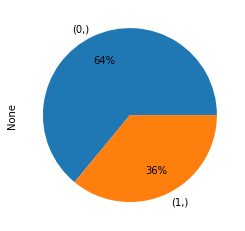

In [85]:
predicted_labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [87]:
data_encoded_edit_bullseye = bullseye.apply(data_encoder.fit_transform)
print(f'In this encoding, {data_encoded_edit_bullseye.iloc[0].values} represents {bullseye.iloc[0].values}')

In this encoding, [1] represents ['p']


## Evaluate the predictions utilizing Rand Index and Confusion Matrix##
Now I want to check to see the correlation between the predicted-labels and the target classes to figure out whether or not I have built a good model. In order to do this I will first utilize the Rand Index. The Rand Index checks the similiarties between two clusters by considering all counting pairs and all pairs of samples. The goal is to reach the target of 1. Now for the confusion matrix its going to create an overall summary in tablular form that illustrates the number of correct and incorrect predictions. Ideally I want more correct predictions as this shows that my model is working.

## Rand Index ##

Since perfect labeling is 1.0 it is neccessary to first encode target labels

In [86]:
data_encoded_edit['predicted-labels'] = clusters

In [88]:
labels = pd.DataFrame()
labels['target'] = data_encoded_edit_bullseye.values.reshape(1, -1).tolist()[0]
labels['prediction'] = clusters
labels.value_counts(["target", "prediction"])

target  prediction
0       0             4198
1       1             2914
        0             1002
0       1               10
dtype: int64

I chose to evaluate the Rand Index utilizing sklearn because I haven't used it before and what better time to learn!

In [89]:
rand_index = rand_score(data_encoded_edit_bullseye.values.reshape(1,-1)[0], clusters)
adjusted_rand_index = adjusted_rand_score(data_encoded_edit_bullseye.values.reshape(1,-1)[0], clusters)

print(f"The Rand Index is: {rand_index}")
print(f"The Adjusted Rand Index is: {adjusted_rand_index}")

The Rand Index is: 0.781869754494126
The Adjusted Rand Index is: 0.563699537027246


So my rand score is 0.78 this is considered good but, lets keep in mind that the predicted value goal was 1 in other projects it might be neccessary to have a rand value that is closer to 1 because errors or uncorrect predicitions can mean money loss or other bad things. 

## Confusion Matrix ##

Now lets get an illustrated version of predicted labels against the bullseye

Text(0.5, 15.0, 'Predicted Labels')

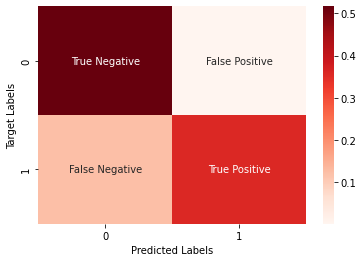

In [90]:
confusion_trix = confusion_matrix(data_encoded_edit_bullseye.values.reshape(1,-1)[0], clusters)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1,1)
sns.heatmap(confusion_trix/np.sum(confusion_trix), annot = labels, fmt='', cmap='Reds')
ax.set_ylabel('Target Labels')
ax.set_xlabel('Predicted Labels')

In [92]:
#Time to do some calculations on the accuracy, recall, F1 score and the precision of my model

True_negative = confusion_trix[0,0]
False_positive = confusion_trix[0,1]
True_positive = confusion_trix[1,1]
False_negative = confusion_trix[1,0]

accuracy = (True_negative + True_positive) / (True_negative + False_negative + True_positive + False_positive)
recall = (True_positive) / (False_negative + True_positive)
precision = (True_positive) / (False_positive + True_positive)
F1_score = 2 * ((precision * recall) / (precision + recall))

print(f"Acurracy is {accuracy}")
print(f"Recall is {recall}")
print(f"Precision is {precision}")
print(f"F1_score is {F1_score}")


Acurracy is 0.8754308222550468
Recall is 0.7441266598569969
Precision is 0.9965800273597811
F1_score is 0.8520467836257309


In [93]:
data['clusters'] = clusters
data.to_csv('.mushroom.csv')

## Conclusion ##

Through the utilization of KMods I was able to cluster categorical data that present results that are considered acceptable. I was able to illustrate the components of a mushroom that made it most likely to be considered poisionous
